<a href="https://colab.research.google.com/github/JakubPac/kurs_ml/blob/main/t_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from keras.datasets import mnist
np.set_printoptions(precision = 4, suppress = True, edgeitems = 5, linewidth = 200)

In [2]:
import matplotlib.pyplot as plt
np.random.seed(42)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Wizualizacja danych

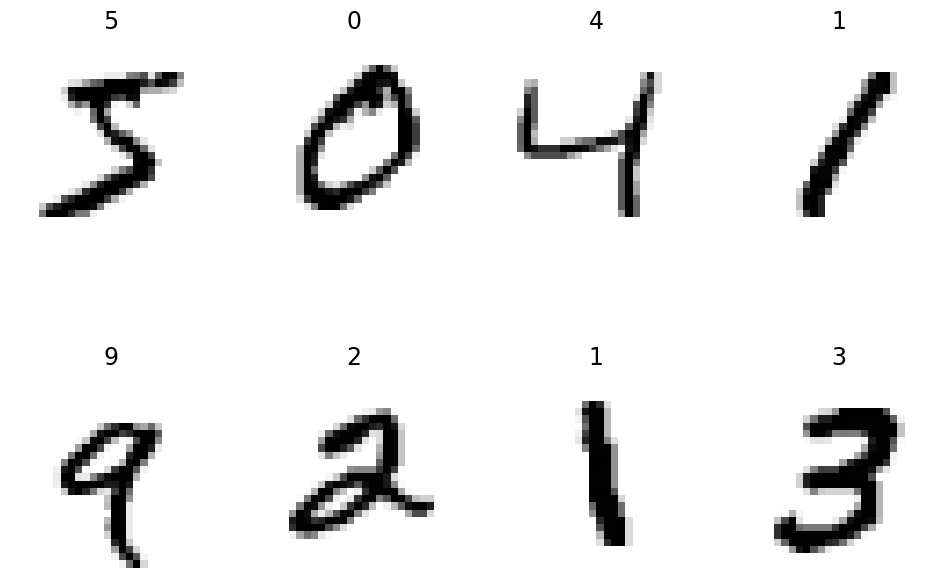

In [4]:
plt.figure(figsize = (12, 8))

for i in range(8):
  plt.subplot(240 + i + 1)
  plt.imshow(X_train[i], cmap = 'gray_r')
  plt.title(y_train[i], color = 'black', fontsize = 17)
  plt.axis('off')
plt.show()

In [11]:
X_train = X_train[:10000]
X_test = X_test[:10000]
y_train = y_train[:10000]
X_train = X_train.reshape(-1, 28*28)
X_train.shape

(10000, 784)

Standaryzacja

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 3)

Wyjasniona wariancja

In [8]:
results = pd.DataFrame(data = {'explained_variance_ratio' : pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.061640,0.061640,1
1,0.043662,0.105302,2
2,0.040458,0.145760,3


In [9]:
fig = go.Figure(data = [go.Bar(x = results['component'], y = results['explained_variance_ratio'], name = 'explained varaiance ratio'),
                        go.Scatter(x = results['component'], y = results['cumulative'], name = 'cumulative')],
                layout = go.Layout(title = 'PCA', width = 900, template = 'plotly_dark'))
fig.show()

In [12]:
X_train_pca_df = pd.DataFrame(data = np.c_[X_train_pca, y_train], columns = ['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype(str)
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,-0.997658,-4.651824,-0.740503,5.0
1,8.682762,-7.124047,-4.195260,0.0
2,2.439044,10.567199,-4.057029,4.0
3,-7.291481,-3.686028,3.064818,1.0
4,-4.791476,4.498186,-5.603754,9.0


In [13]:
px.scatter(X_train_pca_df, 'pca_1', 'pca_2', color = 'class', opacity = 0.5, width = 900, title = 'PCA - 2 components', template = 'plotly_dark')

In [14]:
px.scatter_3d(X_train_pca_df, 'pca_1', 'pca_2', 'pca_3', color = 'class', opacity = 0.5, width = 900, title = 'PCA - 3 components', template = 'plotly_dark')

t-SNE

2 components

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, verbose = 1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 5.869s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.030869
[t-SNE] KL divergence after 1000 iterations: 1.700457


In [16]:
X_train_tsne_df = pd.DataFrame(data = np.c_[X_train_tsne, y_train], columns = ['tsne_1', 'tsne_2', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df.head()

,tsne_1,tsne_2,class
0,0.127470,-36.885952,5.0
1,72.388863,-6.300170,0.0
2,2.609154,77.464775,4.0
3,-62.889400,-7.453016,1.0
4,-22.134279,71.404045,9.0


Wizualizacja TSNE

In [17]:
px.scatter(X_train_tsne_df, 'tsne_1', 'tsne_2', color = 'class', opacity = 0.5, width = 900, title = 't-SNE - 2 components', template = 'plotly_dark')

Porównanie PCA z t-SNE

In [19]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 2, subplot_titles = ['PCA', 't-SNE'], horizontal_spacing = 0.03)
fig1 = px.scatter(X_train_pca_df, 'pca_1', 'pca_2', color = 'class', opacity = 0.5)
fig2 = px.scatter(X_train_tsne_df, 'tsne_1', 'tsne_2', color = 'class', opacity = 0.5)

for i in range(0, 10):
  fig.add_trace(fig1['data'][i], row = 1, col = 1)
  fig.add_trace(fig2['data'][i], row = 1, col = 2)
fig.update_layout(width = 900, showlegend = False, template = 'plotly_dark')
fig.show()

50 komponentów

In [20]:
pca = PCA(n_components = 50)
X_train_pca = pca.fit_transform(X_train_std)
X_train_pca.shape

(10000, 50)

In [21]:
tsne = TSNE(n_components = 2, verbose = 1)
X_train_tsne_50 = tsne.fit_transform(X_train_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.900588
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.057739
[t-SNE] KL divergence after 1000 iterations: 1.645519


In [22]:
X_train_tsne_50_df = pd.DataFrame(data = np.c_[X_train_tsne_50, y_train], columns = ['tsne_1', 'tsne_2', 'class'])
X_train_tsne_50_df['class'] = X_train_tsne_50_df['class'].astype(str)
X_train_tsne_50_df.head()

,tsne_1,tsne_2,class
0,10.381764,-42.427216,5.0
1,79.252991,0.832890,0.0
2,24.963652,46.886581,4.0
3,-82.037102,3.058082,1.0
4,-10.102269,59.231350,9.0


In [23]:
px.scatter(X_train_tsne_50_df, 'tsne_1', 'tsne_2', color = 'class', opacity = 0.5, width = 900, title = 't-SNE - 2 components after PCA', template = 'plotly_dark')

In [24]:
from plotly.subplots import make_subplots

fig = make_subplots(rows = 1, cols = 3, subplot_titles = ['PCA', 't-SNE', 't-SNE after PCA'], horizontal_spacing = 0.03)
fig1 = px.scatter(X_train_pca_df, 'pca_1', 'pca_2', color = 'class', opacity = 0.5)
fig2 = px.scatter(X_train_tsne_df, 'tsne_1', 'tsne_2', color = 'class', opacity = 0.5)
fig3 = px.scatter(X_train_tsne_50_df, 'tsne_1', 'tsne_2', color = 'class', opacity = 0.5)

for i in range(0, 10):
  fig.add_trace(fig1['data'][i], row = 1, col = 1)
  fig.add_trace(fig2['data'][i], row = 1, col = 2)
  fig.add_trace(fig3['data'][i], row = 1, col = 3)
fig.update_layout(width = 900, showlegend = False, template = 'plotly_dark')
fig.show()

3 components

In [25]:
tsne = TSNE(n_components = 3, verbose = 1)
X_train_tsne = tsne.fit_transform(X_train_std)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.035s...
[t-SNE] Computed neighbors for 10000 samples in 7.971s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 5.770266
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.793434
[t-SNE] KL divergence after 1000 iterations: 1.468512


In [26]:
X_train_tsne_df = pd.DataFrame(data = np.c_[X_train_tsne, y_train], columns = ['tsne_1', 'tsne_2','tsne_3', 'class'])
X_train_tsne_df['class'] = X_train_tsne_df['class'].astype(str)
X_train_tsne_df.head()

,tsne_1,tsne_2,tsne_3,class
0,5.932570,-15.451979,-14.083600,5.0
1,22.654732,-7.755692,5.936387,0.0
2,5.886878,19.336391,-10.857412,4.0
3,-15.238463,-6.373180,1.578668,1.0
4,-5.461550,19.963800,-0.416903,9.0


In [28]:
px.scatter_3d(X_train_tsne_df, 'tsne_1', 'tsne_2','tsne_3', color = 'class', opacity = 0.5, width = 900, title = 't-SNE - 3 components', template = 'plotly_dark')